In [4]:
import cv2 as cv
import numpy as numpy
import matplotlib.pyplot as plt

### Histogram from Scratch

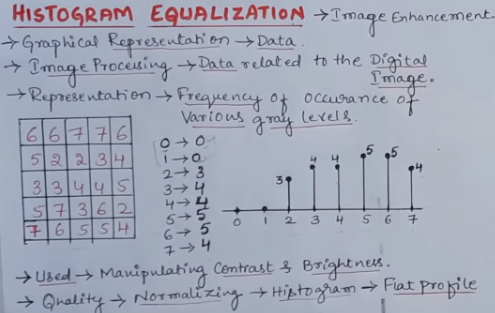

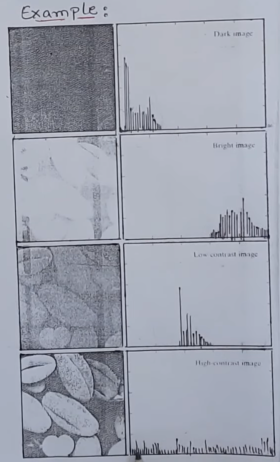

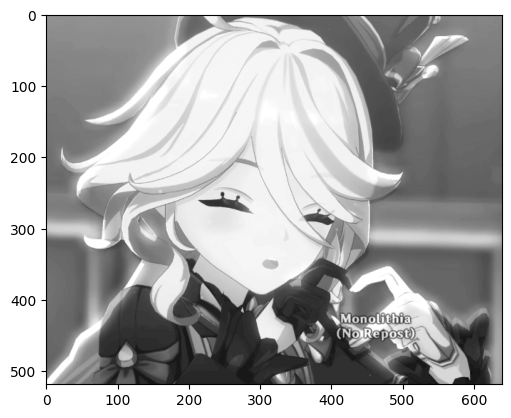

In [5]:
image = cv.imread("furina/furina.png", cv.IMREAD_GRAYSCALE)
image = cv.resize(image, (640, int(image.shape[0] * (640 / image.shape[1]))))

plt.imshow(image, cmap='grey')

In [6]:
image.shape # 816 rows and 1006 columns matrix

(519, 640)

In [7]:
# Create a dictionary with key values from [0, 255] represent the color range. Count each pixels and add 1 to dict[key]
histogram = {}
count_row = 0
for row in image:
    for pixel in row:
        if pixel in histogram:
            histogram[pixel] += 1
        else:
            histogram[pixel] = 1


print(histogram)

{127: 2227, 128: 1314, 129: 1236, 126: 2086, 125: 2078, 130: 1131, 131: 993, 132: 916, 133: 959, 134: 930, 136: 636, 137: 668, 139: 775, 142: 932, 144: 1033, 145: 675, 148: 667, 150: 744, 147: 721, 146: 780, 167: 1033, 192: 966, 176: 872, 163: 829, 161: 765, 160: 1076, 159: 847, 119: 2145, 117: 3051, 114: 3406, 111: 2662, 109: 3485, 105: 2520, 102: 2748, 100: 782, 96: 3554, 92: 5436, 91: 1039, 90: 4486, 89: 6369, 99: 2436, 173: 922, 211: 3266, 210: 2803, 212: 8902, 206: 2046, 200: 1050, 194: 897, 188: 1293, 180: 1245, 149: 853, 106: 3080, 87: 4735, 86: 1038, 88: 957, 85: 4932, 84: 6030, 83: 881, 82: 2971, 81: 735, 80: 2033, 97: 845, 104: 881, 95: 3547, 120: 1633, 121: 836, 122: 2708, 123: 2931, 124: 1272, 198: 901, 201: 975, 184: 1210, 98: 2395, 94: 1019, 103: 3167, 107: 2235, 108: 819, 101: 2725, 110: 3575, 118: 2156, 154: 716, 112: 4014, 183: 758, 179: 892, 174: 921, 115: 2851, 116: 4437, 140: 783, 153: 687, 186: 873, 164: 1251, 162: 859, 152: 731, 93: 3997, 208: 1810, 205: 1885, 193

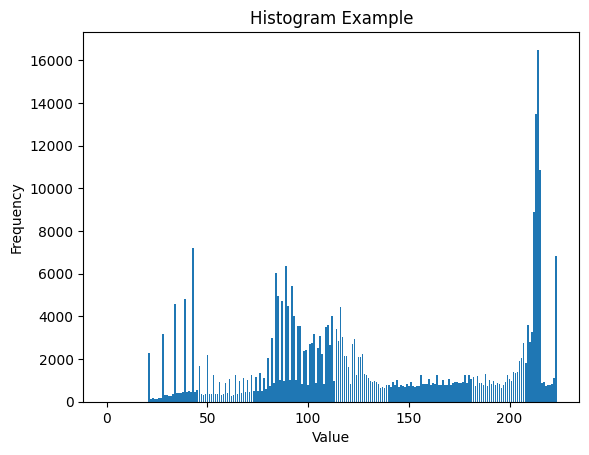

In [8]:
color_range = list(histogram.keys())
frequencies = list(histogram.values())

plt.bar(color_range, frequencies)

# Add title and labels
plt.title('Histogram Example')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show plot
plt.show()

### Histogram using OpenCV Library

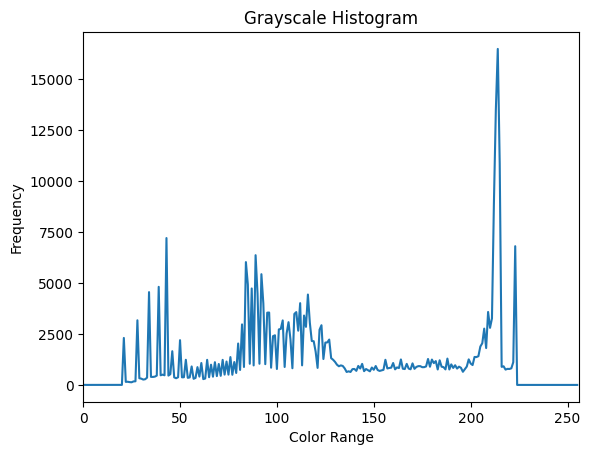

In [9]:
# [0, 256] range to avoid 255 would be exclude
hist = cv.calcHist([image], [0], None, [256], [0, 256]) 

plt.figure()
plt.title('Grayscale Histogram')
plt.xlabel('Color Range')
plt.ylabel('Frequency')
plt.plot(hist)
plt.xlim([0, 256])
plt.show()